In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
datap=pd.read_csv("podlvrydtl.csv")


In [ ]:
#Q1  To have separate column and rows
#Q2 Groupping on rows and columns
#Q3 Year wise sum of PO generate
#Q4 YEar wise count of POs
#Q5 Month wise and year wise count total records and sum of quantity
#Q6 Month wise sum of quanitity ordered .. using month numbers  plot graph and using monthname plot graphs
#Q7 Total POS generated in year 2017
#Q8 calcualte the delay and nodelay in shipping

#Q9 Give ranks to the PL depening upon the delay
# their is method ranked on grouped objects
# method can be min


In [6]:
datap.head(5)

,PO_NO,PL_NO,DLVRY_START_DT,DLVRY_END_DT,DLVRY_QTY,DROP_FLAG,EXTND_DP,RNOTE_QTY,IMMS_PO_SR
0,B1560135,70011930,23-12-15,30-01-16,200.0,Y,30-01-16,0.0,NaN
1,B1560205,72080024,14-03-16,18-04-16,500.0,Y,18-04-16,0.0,NaN
2,B1560205,72080085,14-03-16,18-04-16,500.0,Y,18-04-16,0.0,NaN
3,B1660060,81986075,30-08-16,30-09-16,50.0,Y,30-09-16,0.0,NaN
4,B1720366,33581400,12-12-17,11-01-18,500.0,Y,11-01-18,0.0,NaN


In [7]:
datap["EXTND_DP"]=pd.to_datetime(datap["EXTND_DP"])

datap["DLVRY_START_DT"]=pd.to_datetime(datap["DLVRY_START_DT"])

datap["DLVRY_END_DT"]=pd.to_datetime(datap["DLVRY_END_DT"])

In [8]:
datap["year"]=datap["DLVRY_START_DT"].dt.year
datap["month"]=datap["DLVRY_START_DT"].dt.month

Q ---Year wise count of PO generate

In [11]:
d=datap.groupby("year")["PO_NO"].count()
d

year
2015     6800
2016    11572
2017    11650
2018    10385
2019    10526
2020     8729
2021     1542
2022        3
Name: PO_NO, dtype: int64

Q5--- Month wise and year wise count total records and sum of quantity

In [13]:
d1=datap.groupby(["year","month"]).count()
d1

PO_NO  PL_NO  DLVRY_START_DT  DLVRY_END_DT  DLVRY_QTY  DROP_FLAG  \
year month                                                                     
2015 1       1570   1570            1570          1570       1570       1570   
     2        893    893             893           893        893        893   
     3        542    542             542           542        542        542   
     4        469    469             469           469        469        469   
     5        432    432             432           432        432        432   
...           ...    ...             ...           ...        ...        ...   
2021 9         12     12              12            12         12         12   
     10        12     12              12            12         12         12   
     11         7      7               7             7          7          7   
     12         9      9               9             9          9          9   
2022 1          3      3               3             3          3          3   

            EXTND_DP  RNOTE_QTY  IMMS_PO_SR  
year month                                   
2015 1          1570       1526           2  
     2           893        893           3  
     3           542        541           0  
     4           469        462           0  
     5           432        429           0  
...              ...        ...         ...  
2021 9            12         12          12  
     10           12         12          11  
     11            7          7           7  
     12            9          9           9  
2022 1             3          3           3  

[85 rows x 9 columns]

In [15]:
d1=datap.groupby(["year","month"])["DLVRY_QTY"].sum()
d1

year  month
2015  1        7958559.1
      2        1930218.0
      3        3545463.9
      4        1473721.0
      5         906494.0
                 ...    
2021  9          15696.0
      10         50926.0
      11         74711.0
      12          8371.0
2022  1             52.0
Name: DLVRY_QTY, Length: 85, dtype: float64

Q6--- Month wise sum of quanitity ordered .. using month numbers  plot graph and using monthname plot graphs

<AxesSubplot:xlabel='DLVRY_START_DT'>

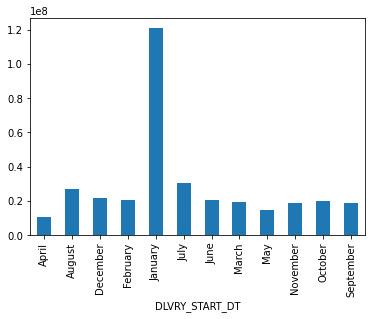

In [19]:
datap.groupby(datap["DLVRY_START_DT"].dt.strftime("%B"))["DLVRY_QTY"].sum().plot(kind="bar")

<AxesSubplot:xlabel='DLVRY_START_DT'>

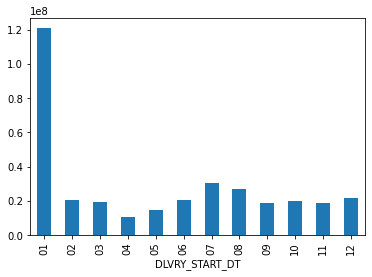

In [20]:
datap.groupby(datap["DLVRY_START_DT"].dt.strftime("%m"))["DLVRY_QTY"].sum().plot(kind="bar")

Q7 Total POS generated in year 2017

In [24]:
year2015=datap[(datap["DLVRY_START_DT"].dt.year)==2015]
year2016=datap[(datap["DLVRY_START_DT"].dt.year)==2016]
year2017=datap[(datap["DLVRY_START_DT"].dt.year)==2017]
year2018=datap[(datap["DLVRY_START_DT"].dt.year)==2018]


In [26]:
year2017["PO_NO"].count()

11650

Q8 calcualte the delay and nodelay in shipping



In [27]:
datap["no_delay"]=datap["DLVRY_END_DT"]==datap["EXTND_DP"]
datap["delay"]=datap["DLVRY_END_DT"].dt.day-datap["EXTND_DP"].dt.day
datap

,PO_NO,PL_NO,DLVRY_START_DT,DLVRY_END_DT,DLVRY_QTY,DROP_FLAG,EXTND_DP,RNOTE_QTY,IMMS_PO_SR,year,month,no_delay,delay
0,B1560135,70011930,2015-12-23,2016-01-30,200.0,Y,2016-01-30,0.0,NaN,2015,12,True,0
1,B1560205,72080024,2016-03-14,2016-04-18,500.0,Y,2016-04-18,0.0,NaN,2016,3,True,0
2,B1560205,72080085,2016-03-14,2016-04-18,500.0,Y,2016-04-18,0.0,NaN,2016,3,True,0
3,B1660060,81986075,2016-08-30,2016-09-30,50.0,Y,2016-09-30,0.0,NaN,2016,8,True,0
4,B1720366,33581400,2017-12-12,2018-11-01,500.0,Y,2018-11-01,0.0,NaN,2017,12,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61202,T2071606,33680243,2021-01-01,2021-03-31,10000.0,N,2021-03-31,0.0,1.0,2021,1,True,0
61203,WT200004,31027088,2020-03-31,2020-03-31,650.0,N,2020-03-31,0.0,1.0,2020,3,True,0
61204,WT200015,31027088,2021-03-31,2021-03-31,450.0,N,2021-03-31,0.0,8.0,2021,3,True,0
61205,WT200021,31027088,2021-03-31,2021-03-31,1573.0,N,2021-03-31,0.0,7.0,2021,3,True,0


In [ ]:
#Q9 Give ranks to the PL depening upon the delay
# their is method ranked on grouped objects
# method can be min

In [30]:
# creating a rank column and passing the returned rank series 
datap["Rank"] = datap["delay"].rank() 
datap

,PO_NO,PL_NO,DLVRY_START_DT,DLVRY_END_DT,DLVRY_QTY,DROP_FLAG,EXTND_DP,RNOTE_QTY,IMMS_PO_SR,year,month,no_delay,delay,Rank
0,B1560135,70011930,2015-12-23,2016-01-30,200.0,Y,2016-01-30,0.0,NaN,2015,12,True,0,30499.0
1,B1560205,72080024,2016-03-14,2016-04-18,500.0,Y,2016-04-18,0.0,NaN,2016,3,True,0,30499.0
2,B1560205,72080085,2016-03-14,2016-04-18,500.0,Y,2016-04-18,0.0,NaN,2016,3,True,0,30499.0
3,B1660060,81986075,2016-08-30,2016-09-30,50.0,Y,2016-09-30,0.0,NaN,2016,8,True,0,30499.0
4,B1720366,33581400,2017-12-12,2018-11-01,500.0,Y,2018-11-01,0.0,NaN,2017,12,True,0,30499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61202,T2071606,33680243,2021-01-01,2021-03-31,10000.0,N,2021-03-31,0.0,1.0,2021,1,True,0,30499.0
61203,WT200004,31027088,2020-03-31,2020-03-31,650.0,N,2020-03-31,0.0,1.0,2020,3,True,0,30499.0
61204,WT200015,31027088,2021-03-31,2021-03-31,450.0,N,2021-03-31,0.0,8.0,2021,3,True,0,30499.0
61205,WT200021,31027088,2021-03-31,2021-03-31,1573.0,N,2021-03-31,0.0,7.0,2021,3,True,0,30499.0


In [34]:
datap.sort_values("delay", inplace = True) 
# creating a rank column and passing the returned rank series 
# change method to 'min' to rank by minimum 
datap["Rank"] = datap["delay"].rank(method ='min') 
datap

,PO_NO,PL_NO,DLVRY_START_DT,DLVRY_END_DT,DLVRY_QTY,DROP_FLAG,EXTND_DP,RNOTE_QTY,IMMS_PO_SR,year,month,no_delay,delay,Rank
10453,H1660098,85130000,2016-10-27,2017-06-01,50.0,N,2017-01-31,0.0,NaN,2016,10,False,-30,1.0
38451,T1610345,30038364,2016-11-25,2017-05-01,10.0,Y,2017-03-31,0.0,NaN,2016,11,False,-30,1.0
3336,H1520121,30638628,2015-09-30,2016-07-01,506.0,N,2016-03-31,0.0,NaN,2015,9,False,-30,1.0
41645,T1650582,30367388,2016-02-11,2017-05-01,2060.0,N,2017-01-31,0.0,NaN,2016,2,False,-30,1.0
31054,R146492V,30010100,2016-01-01,2016-10-01,1500.0,N,2017-03-31,0.0,NaN,2016,1,False,-30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47385,T1750014,33511147,2017-04-13,2017-07-31,31.0,N,2018-10-01,0.0,NaN,2017,4,False,30,61169.0
21119,H1920954,30617418,2019-11-12,2019-12-31,8.0,N,2020-03-01,0.0,1.0,2019,11,False,30,61169.0
55109,T1910373,31310023,2019-05-10,2019-10-31,1058.0,N,2020-10-01,0.0,1.0,2019,5,False,30,61169.0
12293,H1720260,30640305,2018-01-05,2018-07-31,55.0,N,2019-11-01,0.0,NaN,2018,1,False,30,61169.0


In [ ]:
## MAAM

df['EXTND_DP'] - df['DLVRY_END_DT']
df["no_delay"] =df['DLVRY_END_DT'] == df['EXTND_DP']
df["delay"] = df['EXTND_DP'].dt.day - df['DLVRY_END_DT'].dt.day
df["delay"]
# see the records where delay more than 0
delayframe=[df['delay']>0]


## Homework

#Q1  To have separate column and rows
#Q2 Groupping on rows and columns
#Q3 Year wise sum of PO generate
#Q4 YEar wise count of POs
#Q5 Month wise and year wise count total records and sum of quantity
#Q6 Month wise sum of quanitity ordered .. using month numbers  plot graph and using monthname plot graphs
#Q7 Total POS generated in year 2017
#Q8 calcualte the delay and nodelay in shipping

#Q9 Give ranks to the PL depening upon the delay
# their is method ranked on grouped objects
# method can be min


# TOPICS FOR SELF STUDY
# concatenating data frames
# merging data frames
# renaming columns
# breaking a column values and making multiple columns